> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


> # **Sección 6: DASARROLANDO UN MODELO DE MACHINE LEARNING**
![](https://cdn-icons-png.flaticon.com/512/2103/2103652.png)

# **PRIMER PRUEBA: MODELO DESICION TREE CLASSIFIER**
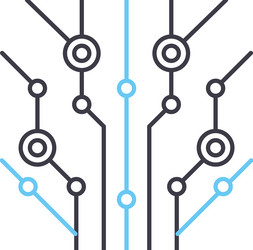

In [ ]:
#IMPORTACIÓN DE LIBRERIAS
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
# Modelos de Clasificacion:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
import xgboost 
from xgboost import XGBClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

/kaggle/input/santander-product-recommendation/test_ver2.csv.zip
/kaggle/input/santander-product-recommendation/sample_submission.csv.zip
/kaggle/input/santander-product-recommendation/train_ver2.csv.zip
¡Librerías importadas con éxito!


In [ ]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


> **Limpieza de nulos**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoANHyQoQEO-vvL7KOkisWsVBvhBIAmDbydWuBeLk7Oc3v1TENE-h79JZQ_BZuT3CmY7Q&usqp=CAU)

In [ ]:
# columnas conyuemp y ult_fec_cli_1t
clientes.drop(['conyuemp', 'ult_fec_cli_1t'],axis=1, inplace=True)
# columna renta
clientes.loc[clientes["renta"].isnull(),"renta"] = np.nanmedian(clientes.renta)
# columna segmento
clientes.loc[clientes["segmento"].isnull(),"segmento"] = '02 - PARTICULARES'
# columna canal_entrada
clientes.loc[clientes["canal_entrada"].isnull(),"canal_entrada"] = 'KHE'
# columna indrel_1mes
clientes["indrel_1mes"] = clientes["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
# columna tiprel_1mes
clientes.loc[clientes["tiprel_1mes"].isnull(),"tiprel_1mes"] = 'I'
# columna nomprov
clientes.loc[clientes["nomprov"].isnull(),"nomprov"] = 'MADRID'
# columna cod_prov
clientes.drop(['cod_prov'],axis=1, inplace=True)
# columna sexo
clientes.loc[clientes["sexo"].isnull(),"sexo"] = 'V'
# columna tipodom
clientes.drop(['tipodom'],axis=1, inplace=True)
#columna indfall
clientes["indfall"].fillna('N', inplace=True)
# columna indext
clientes["indext"].fillna('N', inplace=True)
# columna ind_actividad_cliente
clientes["ind_actividad_cliente"].fillna(0.0, inplace=True)
# columna indresi
clientes["indresi"].fillna('S', inplace=True)
# columna indrel
clientes["indrel"].fillna(1.0, inplace=True)
# columna ind_nuevo
clientes["ind_nuevo"].fillna(0.0, inplace=True)
# columna fecha_alta
cust_ids = clientes[clientes.fecha_alta.isnull()]['ncodpers']
tmp = clientes[clientes.ncodpers.isin(cust_ids)].groupby(['ncodpers', 'fecha_dato']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['ncodpers', 'fecha_dato','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('ncodpers')['fecha_dato'].agg(['min', 'max']), on='ncodpers')
tmp.drop(['fecha_dato'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"ncodpers": "ncodpers", "min": "Min_fecha_dato", "max":"Max_fecha_dato"}, inplace=True)
# columna fecha_alta
clientes = clientes.merge(tmp, on='ncodpers', how = 'outer')
clientes.loc[clientes.fecha_alta.isnull(), 'fecha_alta'] = clientes.Min_fecha_dato
clientes.drop(columns=['Min_fecha_dato', 'Max_fecha_dato'], inplace=True)
# columna pais_residencia
clientes.loc[clientes["pais_residencia"].isnull(),"pais_residencia"] = 'ES'
# columna ind_empleado
clientes.loc[clientes["ind_empleado"].isnull(),"ind_empleado"] = "N"
# columnas ind_nomina_ult1 y ind_nom_pens_ult1
clientes["ind_nomina_ult1"].fillna(0.0, inplace=True)
clientes["ind_nom_pens_ult1"].fillna(0.0, inplace=True)

In [ ]:
#se exporta a csv el dataset limpio
clientes.to_csv('clientes_limpio.csv',header=True,index=False)


**TRANSFORMACIÓN DE LOS DATOS**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQE1caNP74mF0LDe06F6GamNL0kF_YSLtvk2w&usqp=CAU)

In [ ]:
clientes_limpio=pd.read_csv('clientes_limpio.csv', header=0)
clientes_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  nomprov                object 
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               object 
 20  ind_ahor_fin_ult1      int64  
 21  ind_aval_fin_ult1      int64  
 22  ind_cco_fin_ult1

**El Dataset incluye valores atípicos en la columna edad. Por lo tanto se eliminan los datos correspondientes a edad <15 y edad>100 ya que no recomendaremos ningún paquete de producto para alguien cuya edad este en dichos rangos.**

In [ ]:
clientes_limpio['age']=pd.to_numeric(clientes_limpio.age,errors='coerce')
#columna age
clientes_limpio = clientes_limpio[((clientes_limpio["age"] > 15) & (clientes_limpio["age"] < 100))]

**Ahora eliminamos estas columnas porque tienen menos posibilidades de ser elegidos entre los 7 mejores productos recomendados porque, como se vio anteriormente en la sección de exploración y visualización de datos, ningún cliente adoptó estos 2 productos.**

In [ ]:
#columnas ind_ahor_fin_ult1 e ind_aval_fin_ult1
clientes_limpio.drop(columns=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],inplace = True)

In [ ]:
clientes_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13508572 entries, 0 to 13647308
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             float64
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             float64
 7   ind_nuevo              float64
 8   antiguedad             int64  
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  nomprov                object 
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               object 
 20  ind_cco_fin_ult1       int64  
 21  ind_cder_fin_ult1      int64  
 22  ind_cno_fin_ult1

**Transformamos columnas fecha_dato, fecha_alta y antiguedad**

In [ ]:
#variable fecha_dato
clientes_limpio['fecha_dato'] = clientes_limpio['fecha_dato'].replace('-','',regex=True).str.strip(' ,')
clientes_limpio['fecha_dato'] = clientes_limpio['fecha_dato'].astype('float64')

#variable fecha_alta
clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].replace('-','',regex=True).str.strip(' ,')
clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].astype('float64')

#variable antiguedad
clientes_limpio["antiguedad"] = pd.to_numeric(clientes_limpio["antiguedad"],errors = 'coerce')

**TRANSFORMAMOS COLUMNAS CATEGÓRICAS A NUMÉRICAS CON LABELENCODER** 

In [ ]:
cat_columns = clientes_limpio.select_dtypes(include='object').columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categorico 
le.fit(clientes_limpio[cat_columns])

#transformacion de las categoricas en train dataset
clientes_limpio[cat_columns] = le.transform(clientes_limpio[cat_columns])

In [ ]:
clientes_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13508572 entries, 0 to 13647308
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             float64
 1   ncodpers               int64  
 2   ind_empleado           float64
 3   pais_residencia        float64
 4   sexo                   float64
 5   age                    float64
 6   fecha_alta             float64
 7   ind_nuevo              float64
 8   antiguedad             int64  
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            float64
 12  indresi                float64
 13  indext                 float64
 14  canal_entrada          float64
 15  indfall                float64
 16  nomprov                float64
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               float64
 20  ind_cco_fin_ult1       int64  
 21  ind_cder_fin_ult1      int64  
 22  ind_cno_fin_ult1

In [ ]:
#se exporta a csv el dataset limpio y transformado
clientes_limpio.to_csv('clientes_tratado.csv',header=True,index=False)

In [ ]:
clientes_tratado=pd.read_csv('clientes_tratado.csv', header=0)
clientes_tratado.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


# **PLANTEAMIENTO DEL MODELO**
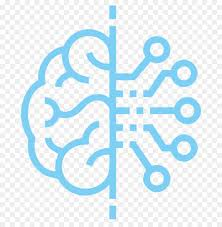


In [ ]:
clientes_tratado.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

**Para el planteamiento del modelo, realizamos un primer paso que es la división de los datos de entrenmaiento y de prueba. En este caso, el 80% de la base de datos se seleccionó para entrenar los modelos y el 20% como conjunto de prueba.**

In [ ]:
# split input y target
X = clientes_tratado.iloc[:,0:20] #variables independientes
y = clientes_tratado.iloc[:,20:42]    #target variable
print (X)
print(y)

          fecha_dato  ncodpers  ind_empleado  pais_residencia  sexo   age  \
0         20150128.0   1375586           3.0             36.0   0.0  35.0   
1         20150228.0   1375586           3.0             36.0   0.0  35.0   
2         20150328.0   1375586           3.0             36.0   0.0  35.0   
3         20150428.0   1375586           3.0             36.0   0.0  35.0   
4         20150528.0   1375586           3.0             36.0   0.0  35.0   
...              ...       ...           ...              ...   ...   ...   
13508567  20160528.0   1185013           3.0             36.0   1.0  53.0   
13508568  20160528.0   1168909           3.0             36.0   1.0  43.0   
13508569  20160528.0   1173729           3.0             36.0   0.0  33.0   
13508570  20160528.0   1164094           3.0             36.0   0.0  54.0   
13508571  20160528.0   1550586           3.0             36.0   0.0  37.0   

          fecha_alta  ind_nuevo  antiguedad  indrel  indrel_1mes  tiprel_1m

In [ ]:
#split de modelo
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=10)

print(X_train.shape, y_train.shape)

(10806857, 20) (10806857, 22)


# **ENTRENANDO EL MODELO**


In [ ]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 42) # con hiperparametros default
model_default.fit(X_train, y_train)

#modelo generado con algun hiperparametros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7) 
model_max_depth.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
#prediccion
y_pred_test = model_max_depth.predict(X_test)
y_pred_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# **METRICAS**
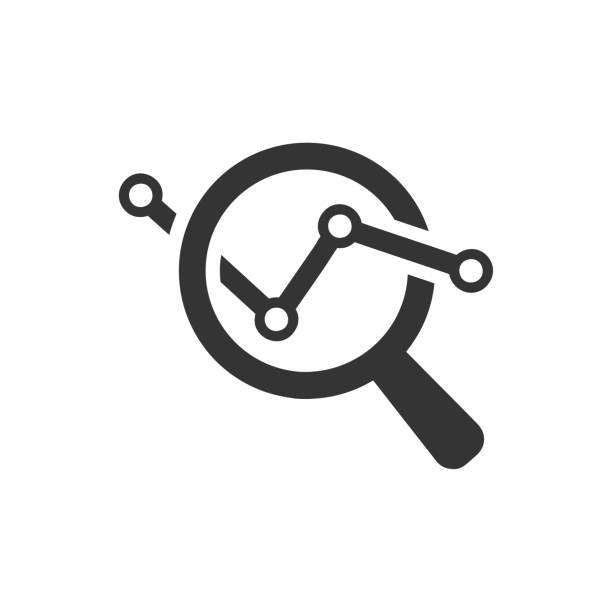

**Evaluación final del modelo en el test**

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
accuracy

0.54420210866061

In [ ]:
#todas las metricas en uno
print(metrics.classification_report(y_test, y_pred_test))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      0.89      0.83   1784493
           1       0.00      0.00      0.00      1095
           2       0.56      0.06      0.10    220410
           3       0.94      0.60      0.74      8423
           4       0.74      0.02      0.04     26435
           5       0.61      0.21      0.32    350701
           6       0.51      0.26      0.34    117700
           7       0.00      0.00      0.00      4838
           8       0.00      0.00      0.00      4466
           9       0.57      0.30      0.39    117532
          10       0.57      0.12      0.19    225031
          11       0.48      0.01      0.01     50384
          12       0.00      0.00      0.00     15995
          13       0.00      0.00      0.00     24684
          14       0.65      0.02      0.04      6781
          15       0.00      0.00      0.00    140916
          16       0.00      0.00      0.00    120646
          17       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **MODELO APLICADO A VARIABLES INDEPENDIENTES Y EL PAQUETE ind_cco_fin_ult1 (CUENTAS CORRIENTES)**

In [ ]:
#modelo aplicado a variables independientes y el paquete ccoo
X_red = clientes_tratado.iloc[:,0:20] #variables independientes
y_red = clientes_tratado.iloc[:,20]    #target variable
print (X_red)
print(y_red)

          fecha_dato  ncodpers  ind_empleado  pais_residencia  sexo   age  \
0         20150128.0   1375586           3.0             36.0   0.0  35.0   
1         20150228.0   1375586           3.0             36.0   0.0  35.0   
2         20150328.0   1375586           3.0             36.0   0.0  35.0   
3         20150428.0   1375586           3.0             36.0   0.0  35.0   
4         20150528.0   1375586           3.0             36.0   0.0  35.0   
...              ...       ...           ...              ...   ...   ...   
13508567  20160528.0   1185013           3.0             36.0   1.0  53.0   
13508568  20160528.0   1168909           3.0             36.0   1.0  43.0   
13508569  20160528.0   1173729           3.0             36.0   0.0  33.0   
13508570  20160528.0   1164094           3.0             36.0   0.0  54.0   
13508571  20160528.0   1550586           3.0             36.0   0.0  37.0   

          fecha_alta  ind_nuevo  antiguedad  indrel  indrel_1mes  tiprel_1m

**SPLIT DEL MODELO**

In [ ]:
#split de modelo
from sklearn.model_selection import train_test_split

X_red_train , X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red , test_size=0.2, random_state=10)

print(X_red_train.shape, y_red_train.shape)

(10806857, 20) (10806857,)


**ENTRENAMIENTO DEL MODELO**

In [ ]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 42) # con hiperparametros default
model_default.fit(X_red_train, y_red_train)

#modelo generado con algun hiperparametros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7) 
model_max_depth.fit(X_red_train, y_red_train)


DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
#prediccion
y_pred_test = model_max_depth.predict(X_red_test)
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

**METRICAS**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('Accuracy score for test data is:', accuracy_score(y_red_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_red_test, y_pred_test))

Accuracy score for test data is: 0.762967226372878


/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


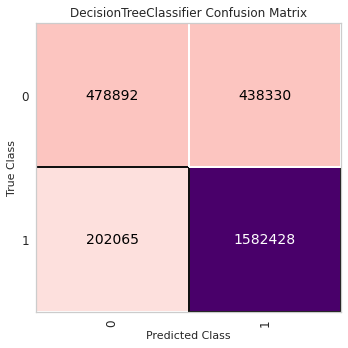

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
cm = ConfusionMatrix(model_max_depth, classes=[0, 1], cmap='RdPu')
cm.score(X_red_test, y_red_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()